# INTRODUCTION

#### https://plotly.com/python/

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

import warnings            
warnings.filterwarnings("ignore") 

import os
print(os.listdir("../input"))


['world-university-rankings']


<a id="1"></a> <br>
# Loading Data and Explanation of Features
<font color='red'>
* timesData içeriği:
    
  <font color='black'>
   * world_rank             
   * university_name       
   * country               
   * teaching                
   * international            
   * research                 
   * citations                
   * income                   
   * total_score              
   * num_students             
   * student_staff_ratio      
   * international_students   
   * female_male_ratio        
   * year 

In [54]:
#Kullanılacak Data okuma
timesData = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")

In [55]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [56]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [57]:
#timesData[(timesData['country'] == 'Turkey')]

<a id="2"></a> <br>
# Line Charts
<font color='red'>
Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities (2011)
<font color='black'>
    
* Import graph_objs as *go*
    
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers  #Plot şekli
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
    
    
* data = is a list that we add traces into it
    
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

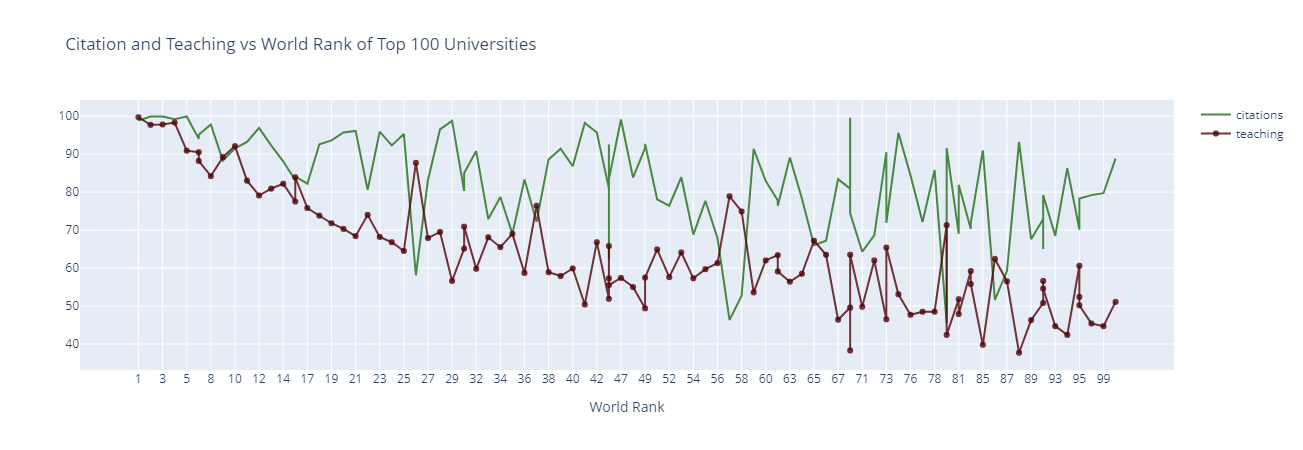

In [58]:
#İlk 100 datayı sınırlama
df = timesData.iloc[ :100 , : ]

import plotly.graph_objs as go

#1.Trace (Citations)
trace1 = go.Scatter(
    
    x = df.world_rank,
    y = df.citations,
    mode = "lines",
    name = "citations",
    marker = dict(color = 'rgba(30, 110, 20, 0.8)'),
    text = df.university_name)
    
    
#2.Trace (Teaching)

trace2 = go.Scatter(
    
    x = df.world_rank,
    y = df.teaching,
    mode = "lines+markers",
    name = "teaching",
    marker = dict(color = 'rgba(80, 2, 8, 0.8)'),
    text = df.university_name)

#Liste olarak Birleştirme
data = [trace1, trace2]
#Grafik info
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)
iplot(fig)


<a id="3"></a> <br>
# Scatter
<font color='red'>
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years
<font color='black'>
    
* Import graph_objs as *go*
    
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
    
* data = is a list that we add traces into it
    
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
    
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

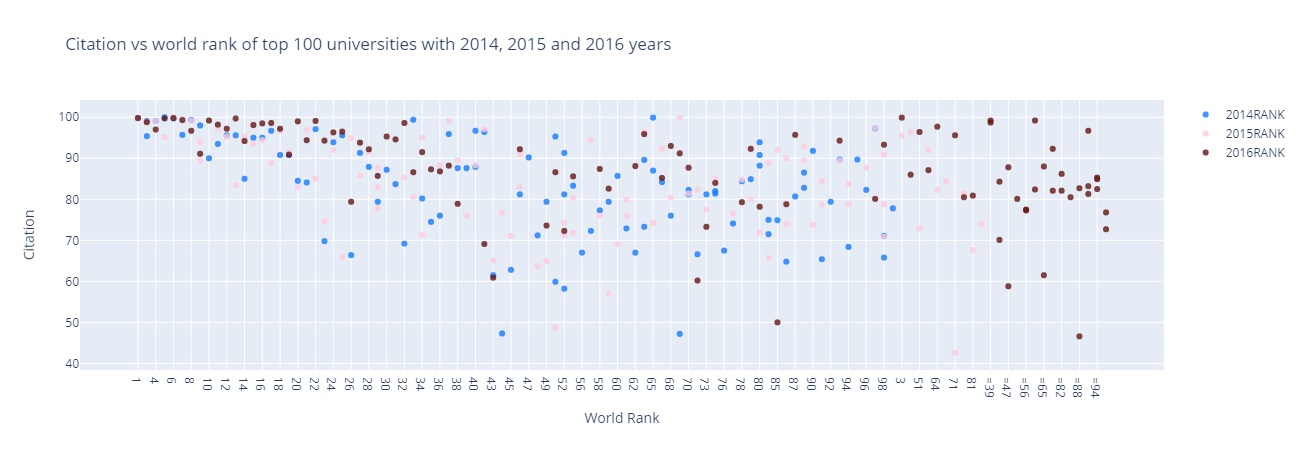

In [59]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

import plotly.graph_objects as go

# 1.Trace
trace1 = go.Scatter(
                    
    x = df2014.world_rank,
    y = df2014.citations,
    mode = "markers",
    name = "2014RANK",
    marker = dict(color = 'rgba(20, 122, 255, 0.8)'),
    text = df2014.university_name)

# 2.Trace
trace2 = go.Scatter(
    
    x = df2015.world_rank,
    y = df2015.citations,
    mode = "markers",
    name = "2015RANK",
    marker = dict(color = 'rgba(255,203,222, 0.8)'),
    text = df2015.university_name)

# 3.Trace

trace3 = go.Scatter(
    x = df2016.world_rank,
    y = df2016.citations,
    mode = "markers",
    name = "2016RANK",
    marker = dict(color = 'rgba(100, 20, 20, 0.8)'),
    text = df2016.university_name)


#Liste olarak Birleştirme
data = [trace1, trace2, trace3]
#Grafik info
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False))

fig = dict(data = data, layout = layout)
iplot(fig)


<a id="4"></a> <br>
# Bar Charts
<font color='red'>
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)
<font color='black'>
    
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

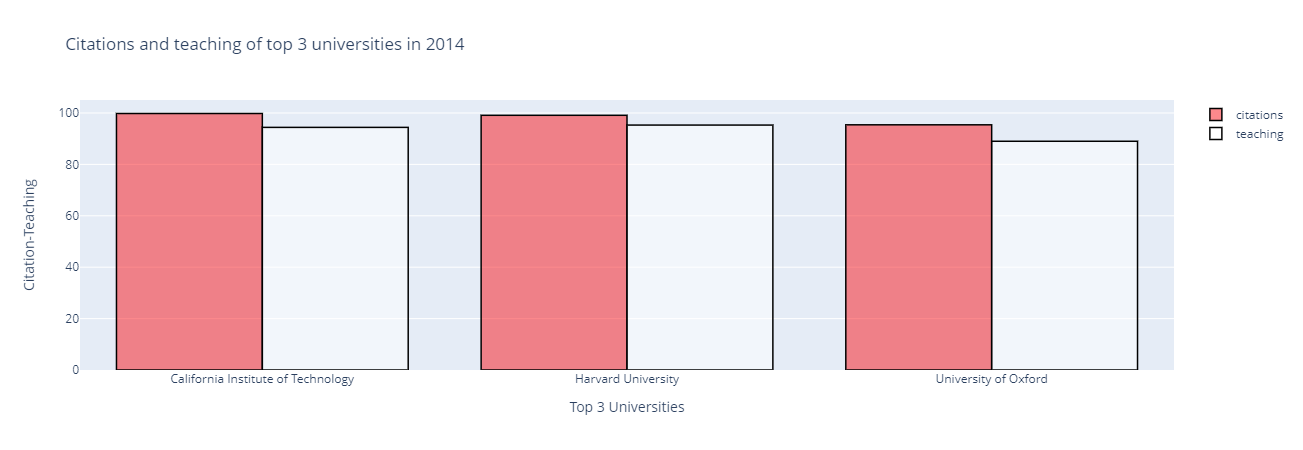

In [60]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

import plotly.graph_objs as go

#1.Trace
trace1 = go.Bar(
    x = df2014.university_name,
    y = df2014.citations,
    name = "citations",
    marker = dict(color = 'rgba(250, 20, 25, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
   text = df2014.country)

#2.Trace
trace2 = go.Bar(
    x = df2014.university_name,
    y = df2014.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(255, 255, 255, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
    text = df2014.country)

data = [trace1, trace2]

layout = go.Layout(title='Citations and teaching of top 3 universities in 2014', 
                xaxis= dict(title= 'Top 3 Universities',ticklen= 5,zeroline= False),
                yaxis= dict(title= 'Citation-Teaching',ticklen= 5,zeroline= False),
                barmode = "group")   ### barmdoe = group (yanyana karşılaştırma) , barmode = relative (üst üste karşılaştırma)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="5"></a> <br>
# Pie Charts
<font color='red'>
Pie Charts Example: Students rate of top 7 universities in 2016
<font color='black'>
    
* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

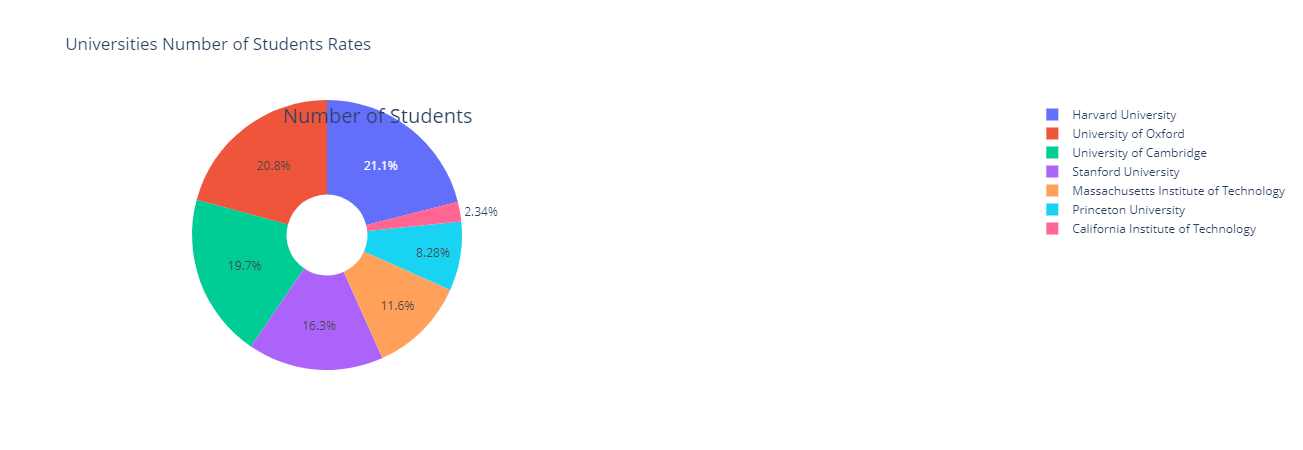

In [61]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:] # ilk 7 üniversite (2016)

pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

#Figure
fig = {
    "data":[   ### TRACE Oluşturma
        {
            "values":pie1_list,
            "labels":labels,
            "domain": {"x": [0, 0.5]},
            "name": "Number of Students",
            "hoverinfo": "label+percent+name",
            "hole": 0.3,
            "type": "pie"
            
        },
    ],
    
    "layout": {
        "title": "Universities Number of Students Rates",
        "annotations": [
            {"font": {"size":20},
             "showarrow": False,
             "text": "Number of Students",
             "x": 0.20,
             "y": 1
            },
        ]
    }
}

iplot(fig)




<a id="6"></a> <br>
# Bubble Charts
<font color='red'>
Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016
<font color='black'>
    
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

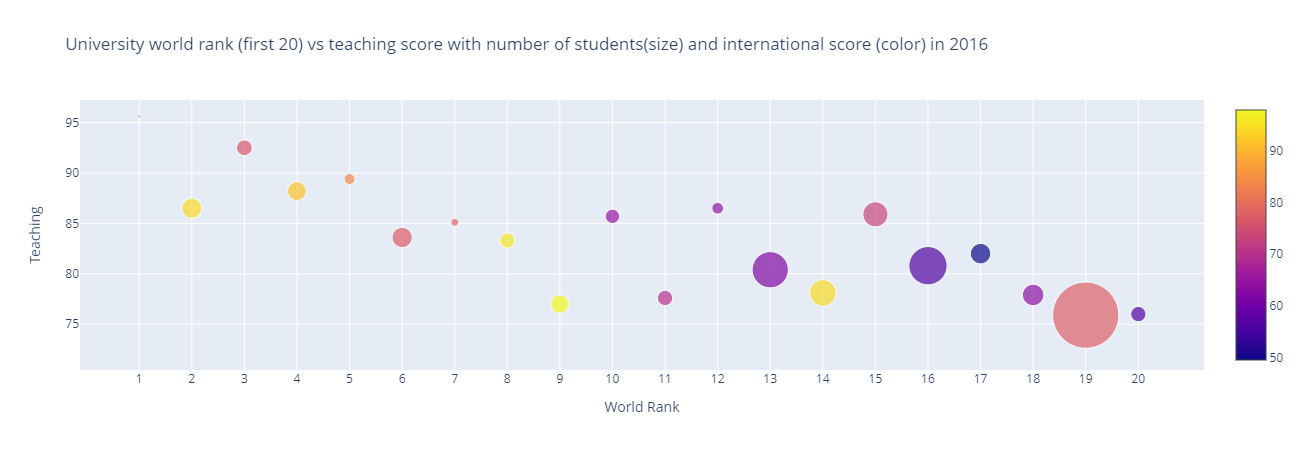

In [62]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:] #İlk 20 üniverstie (2016)

num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'x': df2016.world_rank,
        'y': df2016.teaching,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
        
    }
]

layout = go.Layout(title='University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016', 
                xaxis= dict(title= 'World Rank'),
                yaxis= dict(title= 'Teaching'))
                   
fig = go.Figure(data = data, layout = layout)

iplot(fig)


<a id="7"></a> <br>
# Histogram
<font color='red'>
Lets look at histogram of students-staff ratio in 2011 and 2012 years. 
    <font color='black'>
        
* trace1 = first histogram
    * x = x axis
    * y = y axis
    * opacity = opacity of histogram
    * name = name of legend
    * marker = color of histogram
* trace2 = second histogram
* layout = layout 
    * barmode = mode of histogram like overlay. Also you can change it with *stack*

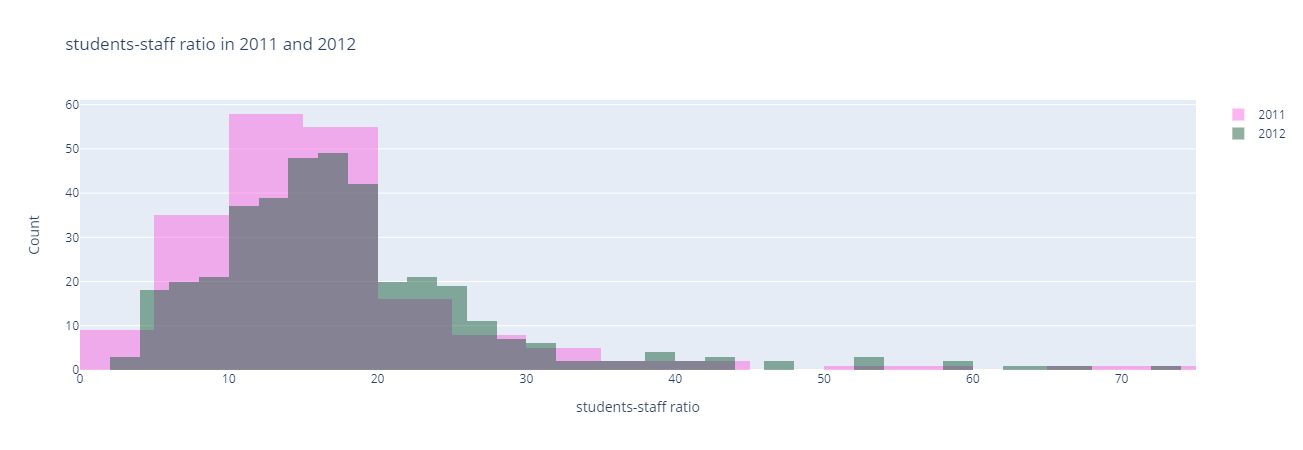

In [63]:
df2011 = timesData.student_staff_ratio[timesData.year == 2011]
df2012 = timesData.student_staff_ratio[timesData.year == 2012]


trace1 = go.Histogram(
    x = df2011,
    opacity = 0.75,
    name = "2011",
    marker = dict(color = 'rgba(250,90,222,0.6)'))

trace2 = go.Histogram(
    x = df2012,
    opacity = 0.75,
    name = "2012",
    marker = dict(color = 'rgba(5,80,40,0.6)'))


data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count')
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud
Lets look at which country is mentioned most in 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

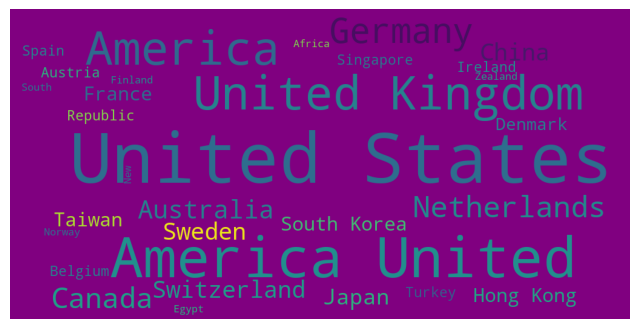

In [64]:
x2011 = timesData.country[timesData.year == 2011]

plt.subplots(figsize=(8,8))

wordcloud = WordCloud(
        background_color='purple',
        width=1024,
        height=512
        ).generate(" ".join(x2011))  # En çok kullanılan kelimeleri ayır ve tekrar etme sayısına göre fontunu ayarla.

plt.imshow(wordcloud)
plt.axis('off') # x ve y eksenlerinin gösterimini kapatır
plt.savefig('graph.png') 

plt.show()


<a id="9"></a> <br>
# Box Plots

* Box Plots
    * Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
        <font color='red'>   
    
        * 25th percentile = quartile 1 (Q1) that is lower quartile
    
        * 75th percentile = quartile 3 (Q3) that is higher quartile
    
        * height of box = IQR = interquartile range = Q3-Q1
    
        * Whiskers = 1.5 * IQR from the Q1 and Q3
    
        * Outliers = being more than 1.5*IQR away from median commonly.
    
    <font color='black'>
        
    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

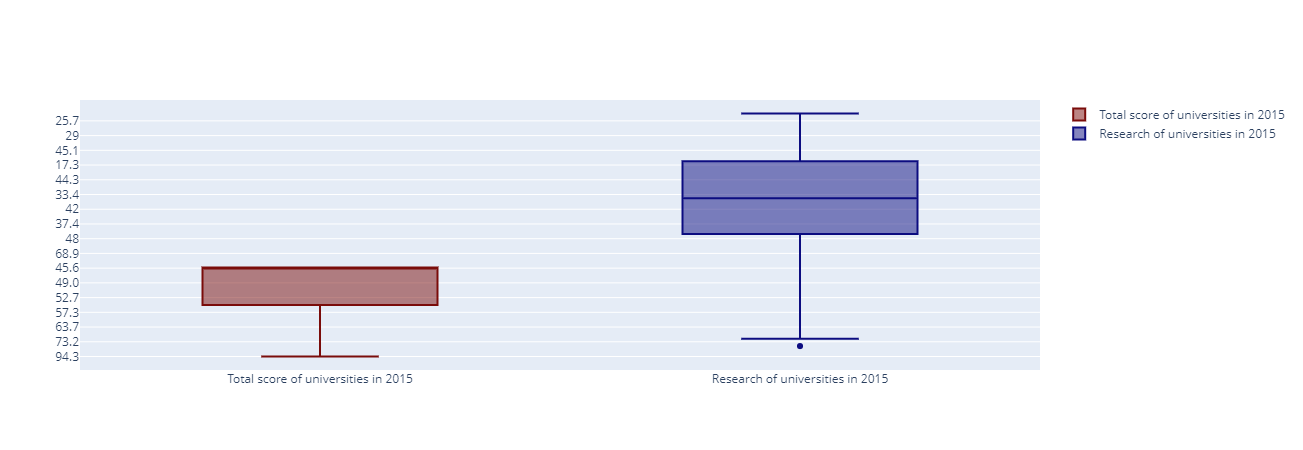

In [65]:
x2015 = timesData[timesData.year == 2015]

trace1 = go.Box(
    
    y = x2015.total_score,
    name = 'Total score of universities in 2015',
    marker = dict(color = 'rgb(122, 12, 10)',)
    
)

trace2 = go.Box(
    
    y=x2015.research,
    name = 'Research of universities in 2015',
    marker = dict(color = 'rgb(12, 12, 128)',)
    
)
data = [trace1, trace2]
iplot(data)

<a id="10"></a> <br>
# Scatter Matrix Plots
<font color='red'>
Scatter Matrix = it helps us to see covariance and relation between more than 2 features
<font color='black'>
    
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

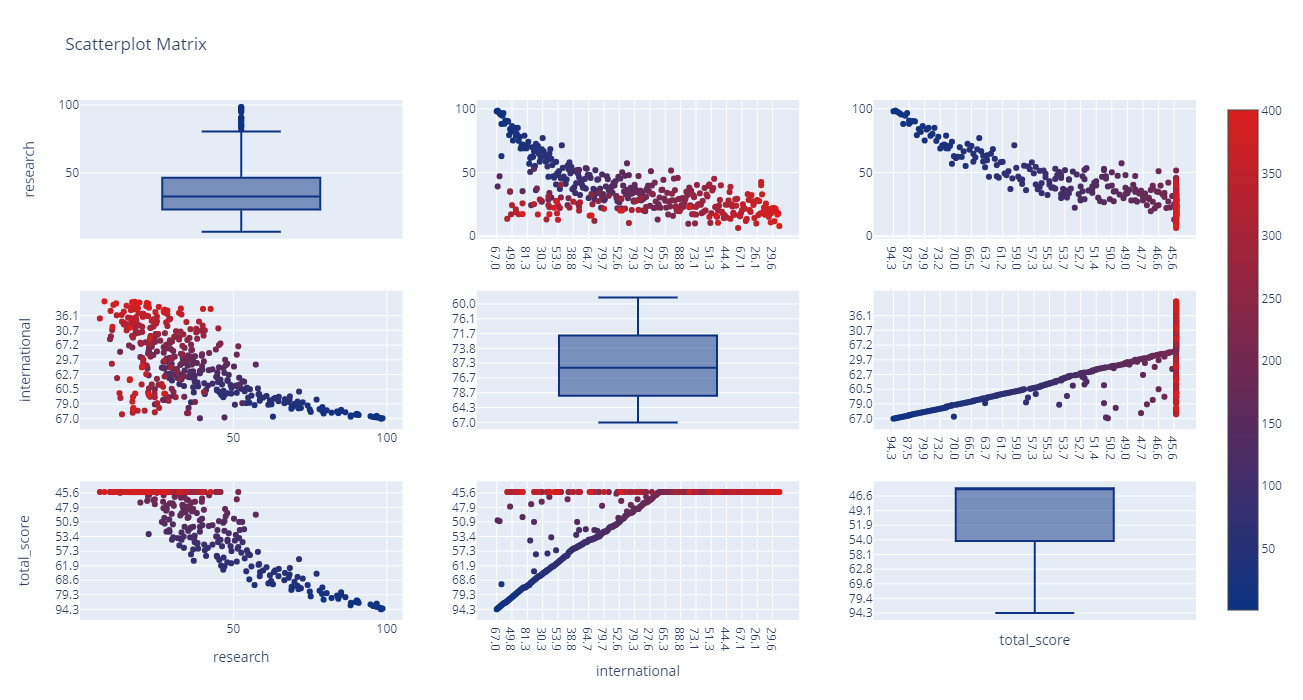

In [66]:
import plotly.figure_factory as ff

dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[ : , ["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

# Scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',colormap_type='cat', height=700, width=700)
iplot(fig)

<a id="11"></a> <br>
# Inset Plots
<font color='red'>
Inset Matrix = 2 plots are in one frame
<font color='black'>

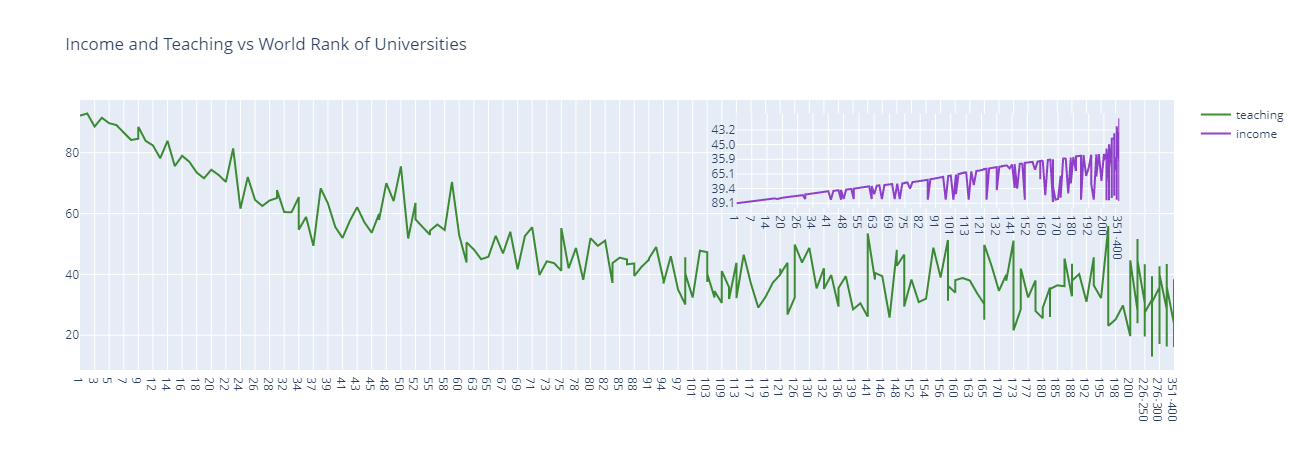

In [67]:
#Teaching - Income Compare

# First plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# Second plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict( color = 'rgba(120,20,190, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



<a id="12"></a> <br>
# 3D Scatter Plot with Colorscaling
<font color='red'>
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
    
<font color='black'>
    
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

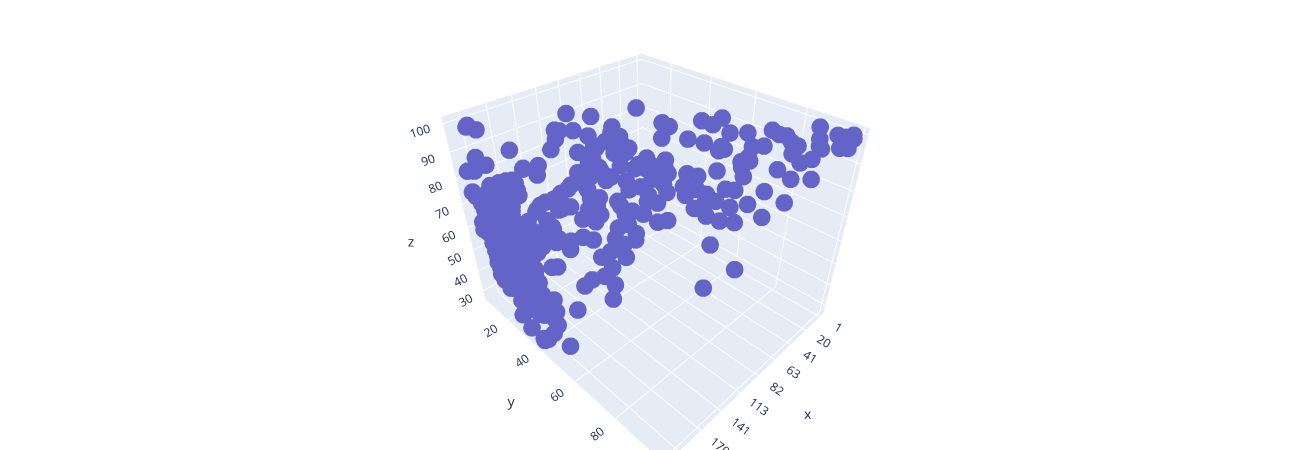

In [68]:
trace1 = go.Scatter3d(
    x = dataframe.world_rank,
    y = dataframe.research,
    z= dataframe.citations,
    mode = 'markers',
    marker=dict(size=10 ,color='rgb(100,100,200)')
   
    
)

data = [trace1]

layout = go.Layout(
                   margin=dict(l=0,r=0,b=0,t=0),
                  )
    
                   
    


fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots
<font color='red'>
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.
<font color='black'>


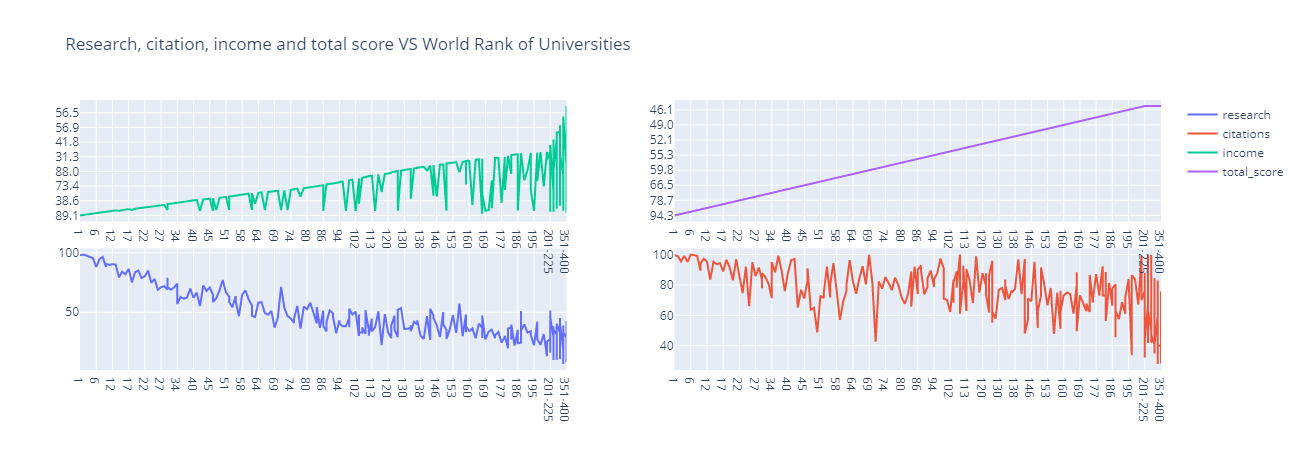

In [69]:
trace1 = go.Scatter( # World rank - Research
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)

trace2 = go.Scatter( # World rank - Citations
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)

trace3 = go.Scatter( # World rank - Income
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)

trace4 = go.Scatter( # World rank - Total score
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)